# Imports

In [1]:
!wget -q "https://github.com/sh0w/machine-learning-pattern-classfication/raw/main/task3_classification/dataset/phase_3_TRAIN_7d499bff69ca69b6_6372c3e_MLPC2021_generic.csv" -O "phase_3_TRAIN_7d499bff69ca69b6_6372c3e_MLPC2021_generic.csv"

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [80]:
df = pd.read_csv("phase_3_TRAIN_7d499bff69ca69b6_6372c3e_MLPC2021_generic.csv")

In [4]:
df.head()

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,essentia_spectral_complexity_stdev,essentia_spectral_rolloff_mean,essentia_spectral_rolloff_stdev,essentia_strong_peak_mean,essentia_strong_peak_stdev,librosa_bpm,librosa_chroma_mean_0,librosa_chroma_var_0,librosa_chroma_pct_10_0,librosa_chroma_pct_50_0,librosa_chroma_pct_90_0,librosa_chroma_mean_1,librosa_chroma_var_1,librosa_chroma_pct_10_1,librosa_chroma_pct_50_1,librosa_chroma_pct_90_1,librosa_chroma_mean_2,librosa_chroma_var_2,librosa_chroma_pct_10_2,librosa_chroma_pct_50_2,librosa_chroma_pct_90_2,librosa_chroma_mean_3,librosa_chroma_var_3,librosa_chroma_pct_10_3,librosa_chroma_pct_50_3,librosa_chroma_pct_90_3,librosa_chroma_mean_4,librosa_chroma_var_4,librosa_chroma_pct_10_4,...,librosa_chroma_var_7,librosa_chroma_pct_10_7,librosa_chroma_pct_50_7,librosa_chroma_pct_90_7,librosa_chroma_mean_8,librosa_chroma_var_8,librosa_chroma_pct_10_8,librosa_chroma_pct_50_8,librosa_chroma_pct_90_8,librosa_chroma_mean_9,librosa_chroma_var_9,librosa_chroma_pct_10_9,librosa_chroma_pct_50_9,librosa_chroma_pct_90_9,librosa_chroma_mean_10,librosa_chroma_var_10,librosa_chroma_pct_10,librosa_chroma_pct_50_10,librosa_chroma_pct_90_10,librosa_chroma_mean_11,librosa_chroma_var_11,librosa_chroma_pct_10_11,librosa_chroma_pct_50_11,librosa_chroma_pct_90_11,librosa_spectral_bandwidth_mean,librosa_spectral_bandwidth_stdev,librosa_spectral_flatness_mean,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength,mean_A,mean_V,quadrant
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,2.986095,2.530877,4423.862305,6692.707031,0.316206,0.329171,246.09375,0.423029,0.146997,0.008853,0.287094,1.000000,0.339058,0.089543,0.007493,0.289652,0.783410,0.372997,0.151724,0.008017,0.119889,1.0,0.380705,0.097001,0.015079,0.304984,0.855147,0.471226,0.157847,0.020450,...,0.158753,0.005426,0.270609,1.0,0.295291,0.087601,0.004258,0.190495,0.764857,0.300751,0.138661,0.001662,0.058367,0.975641,0.253962,0.094545,0.004239,0.074733,0.765817,0.301682,0.099494,0.006088,0.144401,0.815172,3455.577210,1781.705789,0.139911,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727,50.689655,2.724138,1
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,4.181923,2.296265,691.307373,194.689529,0.438665,0.363517,246.09375,0.270370,0.112473,0.008509,0.087995,0.937823,0.191162,0.039303,0.008384,0.107667,0.472149,0.280426,0.145651,0.011143,0.075144,1.0,0.281440,0.038196,0.023332,0.270883,0.559445,0.433210,0.177601,0.013791,...,0.147123,0.006281,0.070170,1.0,0.141696,0.026381,0.005053,0.049705,0.425738,0.124960,0.059223,0.004241,0.040996,0.311990,0.128249,0.030747,0.005173,0.045485,0.455922,0.203408,0.069066,0.006298,0.093133,0.499201,2745.545697,721.292781,0.000275,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387,50.689655,2.724138,1
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,4.303592,2.127036,674.839294,210.393951,0.534696,0.410875,246.09375,0.193968,0.078629,0.003699,0.045964,0.661004,0.196718,0.045585,0.006544,0.134951,0.538369,0.394663,0.185849,0.008034,0.111176,1.0,0.252466,0.056374,0.015938,0.169116,0.649735,0.160429,0.087263,0.009318,...,0.170728,0.006055,0.137642,1.0,0.199484,0.028600,0.010491,0.160100,0.427959,0.275843,0.136039,0.009648,0.091636,1.000000,0.213787,0.054531,0.008481,0.097247,0.541696,0.172331,0.083168,0.005382,0.043987,0.575106,2593.570349,583.569947,0.000202,0.000314,

In [6]:
pp = {}
pianists = []
piece_ids = []
for i in df.id.values:
  p = i[:2]
  pid = i[3:5]
  ppp = i[:5]

  if p not in pianists:
    pianists.append(p)
  if pid not in piece_ids:
    piece_ids.append(pid)
    pp[pid] = {}
  
  if ppp not in pp[pid]:
    pp[pid][ppp] = 1
  else:
    pp[pid][ppp] += 1

len(pianists), len(piece_ids), len(pp), pianists, pp

print("####### NUMBER OF SAMPLES per PIANIST/PIECE ########")
print("        ",end="\t")
for p in pianists:
  print(p, end="\t")
print("")
for pid in piece_ids:
  print("piece", pid, end="\t")

  for k, v in pp[pid].items():
    c = df[df["id"].str.startswith(k)].quadrant.values[0]
    print(v, end="\t")

  print("\n")



print("####### CLASS LABEL per PIANIST/PIECE ########")
print("        ",end="\t")
for p in pianists:
  print(p, end="\t")
print("")
for pid in piece_ids:
  print("piece", pid, end="\t")

  for k, v in pp[pid].items():
    c = df[df["id"].str.startswith(k)].quadrant.values[0]
    print(c, end="\t")

  print("\n")



####### NUMBER OF SAMPLES per PIANIST/PIECE ########
        	GG	FG	AH	SR	AS	RT	
piece 01	13	11	11	10	9	16	

piece 02	10	18	10	14	10	14	

piece 03	11	12	8	6	8	9	

piece 04	8	12	9	8	8	10	

piece 05	5	6	7	6	7	6	

piece 08	17	22	31	37	23	28	

piece 09	5	5	7	5	6	7	

piece 11	7	6	9	7	11	7	

piece 12	9	12	14	14	13	17	

piece 14	9	9	9	7	8	11	

piece 15	20	26	21	25	19	31	

piece 16	30	35	32	37	26	35	

piece 18	5	5	5	5	5	7	

piece 19	16	12	12	10	12	16	

piece 20	5	5	6	5	5	9	

piece 21	4	4	5	4	4	5	

piece 22	6	6	8	6	6	7	

piece 24	19	31	26	31	24	27	

piece 25	12	9	8	7	8	9	

piece 26	12	13	12	12	10	11	

piece 27	5	4	5	4	4	7	

piece 28	22	26	18	24	16	21	

piece 29	3	4	4	3	4	4	

piece 30	13	14	17	13	16	16	

piece 31	14	8	11	10	11	11	

piece 32	12	16	9	16	7	16	

piece 34	8	16	17	16	12	13	

piece 35	7	8	7	7	8	7	

piece 36	9	30	13	19	12	20	

piece 37	5	4	7	6	6	7	

piece 38	13	9	11	14	12	17	

piece 39	6	5	5	4	4	6	

piece 41	6	6	7	5	6	6	

piece 45	4	5	5	4	4	6	

piece 46	8	19	13	14	12	13	

piece 47	12	49

# Split Dataset to X and y_arousal, y_valence

In [8]:
# drop target value, student annotations and string ID from input features:
# all that is left are the music features:
X = df.drop(columns=['quadrant','mean_A','mean_V','id','score_mode','score_key_strength'])

# we want to predict the mean_A and mean_V values:
# y = df['quadrant'].values
y_arousal = df["mean_A"]
y_valence = df["mean_V"]


class1:  473 
class2:  274 
class3:  1380 
class4:  480


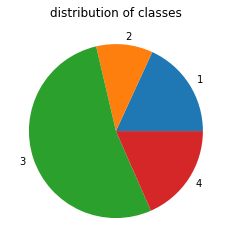

In [9]:
X_class1 = X[df["quadrant"] == 1]
X_class2 = X[df["quadrant"] == 2]
X_class3 = X[df["quadrant"] == 3]
X_class4 = X[df["quadrant"] == 4]
print("class1: ", len(X_class1), "\nclass2: ",len(X_class2),"\nclass3: ", len(X_class3), "\nclass4: ",len(X_class4))
plt.title("distribution of classes")
plt.pie([len(X_class1), len(X_class2), len(X_class3), len(X_class4)], labels=[1,2,3,4])
plt.show()

# Perform GridSearchCV to find best parameters for a Neural Network (MLPRegression)

In [126]:

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
from sklearn.decomposition import PCA, KernelPCA

pca = PCA()
kpca = KernelPCA()
mlp_gs = MLPRegressor(max_iter=200)

parameter_space = [{
    #"kpca__kernel": ["rbf", "sigmoid", "linear", "poly"],
    #'kpca__n_components': [5, 20, 40, 90],
    'nn__hidden_layer_sizes': [(5,10), (10,20,10), (5,7,5), (5,7), (10,5) ],
    'nn__activation': ['tanh', 'relu', 'sigmoid'],
    'nn__solver': ['sgd', 'adam', 'lbfgs'],
    'nn__alpha': [0.0005, 0.005, 0.05],
    'nn__learning_rate': ['adaptive','constant']
}]

pipeline = Pipeline([
        #('scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ("std_scaler", StandardScaler()),
        #("pca", pca),
        #("kpca", kpca),
        ('nn', mlp_gs)
      ])

In [ ]:
clf_v = RandomizedSearchCV(pipeline, parameter_space, n_jobs=-1, cv=5, return_train_score=True, verbose=4, n_iter=300)

clf_v.fit(X, y_valence)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 270 is smaller than n_iter=300. Running 270 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 609 tasks      | elapsed:  8.9min


In [12]:

clf_a = RandomizedSearchCV(pipeline, parameter_space, n_jobs=-1, cv=5, verbose=4, n_iter=300)
clf_a.fit(X, y_arousal)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 270 is smaller than n_iter=300. Running 270 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 609 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 12.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('std_scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('nn',
                                              MLPRegressor(activation='relu',
                                                           alpha=0.0001,
                                                           batch_size='auto',
                                                           beta_1=0.9,
                                                           beta_2=0.999,
                                                           early_stopping=False,
                                                           epsilon=1e-08,
                                        

In [15]:

print("AROUSAL: Best parameter (CV score=%0.3f):" % clf_a.best_score_)
print(clf_a.best_params_)

print("VALENCE: Best parameter (CV score=%0.3f):" % clf_v.best_score_)
print(clf_v.best_params_)


AROUSAL: Best parameter (CV score=0.607):
{'nn__solver': 'adam', 'nn__learning_rate': 'adaptive', 'nn__hidden_layer_sizes': (10, 20, 10), 'nn__alpha': 0.05, 'nn__activation': 'relu'}
VALENCE: Best parameter (CV score=0.363):
{'nn__solver': 'sgd', 'nn__learning_rate': 'adaptive', 'nn__hidden_layer_sizes': (10, 5), 'nn__alpha': 0.05, 'nn__activation': 'relu'}


In [16]:
mean_A_predicted = clf.predict(X)
mean_V_predicted = clf_v.predict(X)

In [105]:
abs_error_arousal = [abs(y_arousal[i] - mean_A_predicted[i]) for i in range(2607)]
abs_error_valence = [abs(y_valence[i] - mean_V_predicted[i]) for i in range(2607)]
mean_error_arousal, med_error_arousal = np.mean(abs_error_arousal), np.median(abs_error_arousal)
mean_error_valence, med_error_valence = np.mean(abs_error_valence), np.median(abs_error_valence)

print("MEAN ERROR:  \t", mean_error_arousal, mean_error_valence,
      "\nMEDIAN ERROR: \t", med_error_arousal, med_error_valence,)

MEAN ERROR:  	 7.897180680228799 0.9465468922606833 
MEDIAN ERROR: 	 6.191644482878267 0.7610853607115808


In [89]:
# add column to dataframe:
df["predicted_mean_A"] = mean_A_predicted
df["predicted_mean_V"] = mean_V_predicted 

# predict quadrants based on predicted meanA and meanV:
df.loc[(df["predicted_mean_A"] > 50) & (df["predicted_mean_V"] > 0), "predicted_quadrant"] = 1
df.loc[(df["predicted_mean_A"] > 50) & (df["predicted_mean_V"] <= 0), "predicted_quadrant"] = 2
df.loc[(df["predicted_mean_A"] <= 50) & (df["predicted_mean_V"] <= 0), "predicted_quadrant"] = 3
df.loc[(df["predicted_mean_A"] <= 50) & (df["predicted_mean_V"] > 0), "predicted_quadrant"] = 4

# cast column to int
df.predicted_quadrant = df.predicted_quadrant .astype(int)

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,essentia_spectral_complexity_stdev,essentia_spectral_rolloff_mean,essentia_spectral_rolloff_stdev,essentia_strong_peak_mean,essentia_strong_peak_stdev,librosa_bpm,librosa_chroma_mean_0,librosa_chroma_var_0,librosa_chroma_pct_10_0,librosa_chroma_pct_50_0,librosa_chroma_pct_90_0,librosa_chroma_mean_1,librosa_chroma_var_1,librosa_chroma_pct_10_1,librosa_chroma_pct_50_1,librosa_chroma_pct_90_1,librosa_chroma_mean_2,librosa_chroma_var_2,librosa_chroma_pct_10_2,librosa_chroma_pct_50_2,librosa_chroma_pct_90_2,librosa_chroma_mean_3,librosa_chroma_var_3,librosa_chroma_pct_10_3,librosa_chroma_pct_50_3,librosa_chroma_pct_90_3,librosa_chroma_mean_4,librosa_chroma_var_4,librosa_chroma_pct_10_4,...,librosa_chroma_pct_90_7,librosa_chroma_mean_8,librosa_chroma_var_8,librosa_chroma_pct_10_8,librosa_chroma_pct_50_8,librosa_chroma_pct_90_8,librosa_chroma_mean_9,librosa_chroma_var_9,librosa_chroma_pct_10_9,librosa_chroma_pct_50_9,librosa_chroma_pct_90_9,librosa_chroma_mean_10,librosa_chroma_var_10,librosa_chroma_pct_10,librosa_chroma_pct_50_10,librosa_chroma_pct_90_10,librosa_chroma_mean_11,librosa_chroma_var_11,librosa_chroma_pct_10_11,librosa_chroma_pct_50_11,librosa_chroma_pct_90_11,librosa_spectral_bandwidth_mean,librosa_spectral_bandwidth_stdev,librosa_spectral_flatness_mean,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength,mean_A,mean_V,quadrant,predicted_mean_A,predicted_mean_V,predicted_quadrant
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,2.986095,2.530877,4423.862305,6692.707031,0.316206,0.329171,246.093750,0.423029,0.146997,0.008853,0.287094,1.000000,0.339058,0.089543,0.007493,0.289652,0.783410,0.372997,0.151724,0.008017,0.119889,1.000000,0.380705,0.097001,0.015079,0.304984,0.855147,0.471226,0.157847,0.020450,...,1.0,0.295291,0.087601,0.004258,0.190495,0.764857,0.300751,0.138661,0.001662,0.058367,0.975641,0.253962,0.094545,0.004239,0.074733,0.765817,0.301682,0.099494,0.006088,0.144401,0.815172,3455.577210,1781.705789,0.139911,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727,50.689655,2.724138,1,45.216172,1.749838,4
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,4.181923,2.296265,691.307373,194.689529,0.438665,0.363517,246.093750,0.270370,0.112473,0.008509,0.087995,0.937823,0.191162,0.039303,0.008384,0.107667,0.472149,0.280426,0.145651,0.011143,0.075144,1.000000,0.281440,0.038196,0.023332,0.270883,0.559445,0.433210,0.177601,0.013791,...,1.0,0.141696,0.026381,0.005053,0.049705,0.425738,0.124960,0.059223,0.004241,0.040996,0.311990,0.128249,0.030747,0.005173,0.045485,0.455922,0.203408,0.069066,0.006298,0.093133,0.499201,2745.545697,721.292781,0.000275,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387,50.689655,2.724138,1,42.078254,0.360194,4
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,4.303592,2.127036,674.839294,210.393951,0.534696,0.410875,246.093750,0.193968,0.078629,0.003699,0.045964,0.661004,0.196718,0.045585,0.006544,0.134951,0.538369,0.394663,0.185849,0.008034,0.111176,1.000000,0.252466,0.056374,0.015938,0.169116,0.649735,0.160429,0.087263,0.009318,...,1.0,0.199484,0.028600,0.010491,0.160100,0.427959,0.275843,0.136039,0.009648,0.091636,1.000000,0.213787,0.054531,0.008481,0.097247,0.541696,0.172331,0.083168,0.005382,0.043987,0.575106,2593.570349,583.569947,0.000202,0.000314,0.201885,0.016944,-0.337422,0.103853,

In [103]:
correct_quadrant_score = sum(df['predicted_quadrant'] == df['quadrant']) / len(df)
print("Percentage of Samples with Quadrant correctly predicted:", correct_quadrant_score)

Percentage of Samples with Quadrant correctly predicted: 0.7809742999616417


In [106]:
df.to_csv("dataset_with_predicted_mean_A_mean_V.csv")

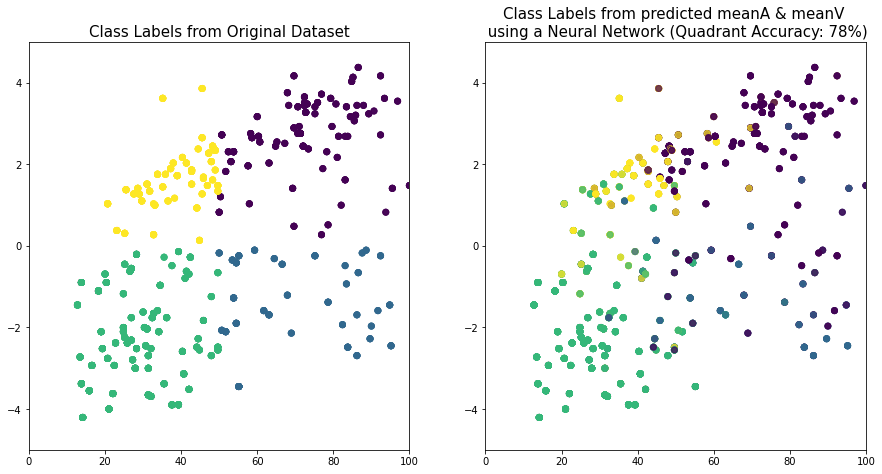

In [125]:
plt.figure(figsize=(15,7.5))
plt.subplot(1, 2, 1)

plt.scatter(x=df.mean_A, y=df.mean_V, c=df.quadrant, alpha=0.7)
plt.title("Class Labels from Original Dataset", fontsize=15)
plt.xlim(0,100)
plt.ylim(-5,5)

plt.subplot(1, 2, 2)
#plt.figure(figsize=(10,10))
plt.scatter(x=df.mean_A, y=df.mean_V, c=df.predicted_quadrant, alpha=0.7)
plt.title("Class Labels from predicted meanA & meanV \n using a Neural Network (Quadrant Accuracy: 78%)", fontsize=15)
plt.xlim(0,100)
plt.ylim(-5,5)
plt.show()